In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/barc-intern-1/OdettedataML1.csv
/kaggle/input/barc-intern-1/japan2.csv


In [2]:
!pip install pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 8.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 78.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 21.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 92.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 91.6 MB/s eta 0:00:00:00:0

In [3]:
import pycaret
import pandas as pd
from pycaret.regression import *
#warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])
from sklearn import set_config
set_config(display='text')
import optuna
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
from datetime import datetime

In [4]:
df3 = pd.read_csv("/kaggle/input/barc-intern-1/japan2.csv")
df3.head()

,DeltaNDT,Ni,P,T,Fluence,Cu
0,12,0.74,0.005,289,2.70,0.018
1,7,0.75,0.005,289,0.86,0.020
2,2,0.73,0.005,289,0.90,0.029
3,10,0.73,0.005,289,2.60,0.029
4,32,0.57,0.005,288,0.06,0.030


In [5]:
df4=df3.drop('DeltaNDT',axis=1)

In [6]:
df_norm2 = (df4-df4.min())/(df4.max()-df4.min())
df_norm2 = pd.concat((df_norm2, df3.DeltaNDT),axis=1)

print("Scaled Dataset Using Pandas")
df_norm2.head()

Scaled Dataset Using Pandas


,Ni,P,T,Fluence,Cu,DeltaNDT
0,0.656566,0.181818,1.0,0.416404,0.022727,12
1,0.666667,0.181818,1.0,0.126183,0.034091,7
2,0.646465,0.181818,1.0,0.132492,0.085227,2
3,0.646465,0.181818,1.0,0.400631,0.085227,10
4,0.484848,0.181818,0.8,0.000000,0.090909,32


In [7]:
grid = setup(data=df_norm2, target='DeltaNDT',train_size=0.8, session_id =234)

,Description,Value
0,Session id,234
1,Target,DeltaNDT
2,Target type,Regression
3,Original data shape,"(109, 6)"
4,Transformed data shape,"(109, 6)"
5,Transformed train set shape,"(87, 6)"
6,Transformed test set shape,"(22, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [8]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,8.3842,107.7515,10.1457,0.7759,0.4648,0.4351,0.2910
et,Extra Trees Regressor,8.6214,110.7245,10.2848,0.7742,0.5014,0.4586,0.0570
gbr,Gradient Boosting Regressor,8.6249,117.5688,10.5693,0.7669,0.5045,0.4312,0.0410
rf,Random Forest Regressor,8.7580,121.4862,10.8120,0.7597,0.4691,0.4671,0.0780
ada,AdaBoost Regressor,9.6871,143.9795,11.6660,0.7047,0.5093,0.5777,0.0390
xgboost,Extreme Gradient Boosting,9.8638,147.3813,11.8253,0.6667,0.4993,0.4787,0.0430
huber,Huber Regressor,10.8578,203.3103,14.0144,0.6174,0.6487,0.5586,0.0120
lightgbm,Light Gradient Boosting Machine,10.3579,182.8055,13.1279,0.6122,0.5205,0.4899,2.5630
ridge,Ridge Regression,11.2890,213.5262,14.1878,0.6121,0.5697,0.6344,0.0150
br,Bayesian Ridge,11.0628,204.6052,14.0588,0.6117,0.5903,0.5838,0.0100


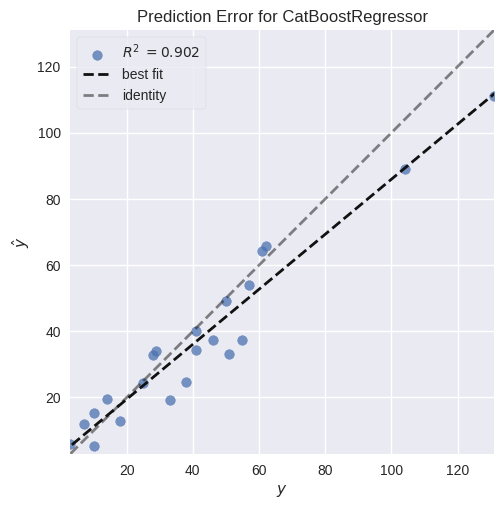

In [9]:
plot_model(best, plot = 'error')

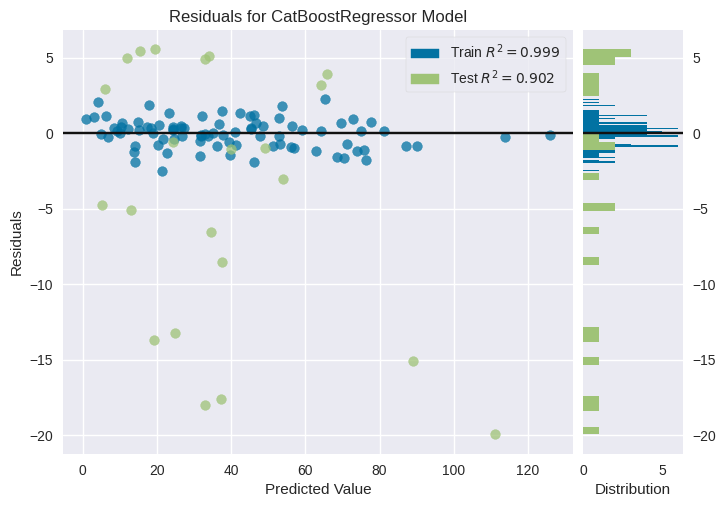

In [10]:
plot_model(best, plot = 'residuals')

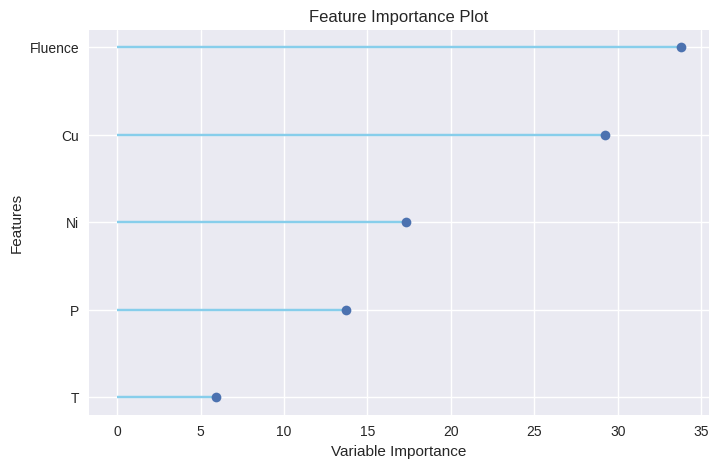

In [11]:
plot_model(best, plot = 'feature')

In [12]:
catBoost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.9462,134.2053,11.5847,0.8204,0.2508,0.1975
1,8.9165,158.8891,12.6051,0.8076,0.2706,0.2218
2,8.9836,120.4155,10.9734,0.7954,1.1035,0.3110
3,9.2468,116.8734,10.8108,0.8077,0.5536,0.6681
4,7.8137,93.9560,9.6931,0.9281,0.3289,0.3299
5,11.5742,185.1196,13.6059,0.2957,0.7701,1.4170
6,8.0419,80.1884,8.9548,0.7621,0.3701,0.2734
7,8.9482,93.5896,9.6742,0.8307,0.4136,0.3695
8,4.7204,32.2511,5.6790,0.8457,0.1757,0.1628


In [68]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.9462,134.2053,11.5847,0.8204,0.2508,0.1975
1,8.9165,158.8891,12.6051,0.8076,0.2706,0.2218
2,8.9836,120.4155,10.9734,0.7954,1.1035,0.3110
3,9.2468,116.8734,10.8108,0.8077,0.5536,0.6681
4,7.8137,93.9560,9.6931,0.9281,0.3289,0.3299
5,11.5742,185.1196,13.6059,0.2957,0.7701,1.4170
6,8.0419,80.1884,8.9548,0.7621,0.3701,0.2734
7,8.9482,93.5896,9.6742,0.8307,0.4136,0.3695
8,4.7204,32.2511,5.6790,0.8457,0.1757,0.1628


In [69]:
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.6089,100.6676,10.0333,0.8652,0.2959,0.1894
1,8.4435,127.7348,11.3020,0.8453,0.2289,0.1932
2,8.5215,111.7153,10.5695,0.8102,1.1051,0.2979
3,11.0647,181.4568,13.4706,0.7015,0.8258,0.6883
4,5.6425,61.3531,7.8328,0.9530,0.2390,0.2053
5,11.9397,184.7376,13.5918,0.2971,0.7545,1.3717
6,7.9424,75.6947,8.7003,0.7755,0.3535,0.3071
7,9.4366,102.4641,10.1225,0.8146,0.4288,0.3686
8,4.8381,28.2601,5.3160,0.8648,0.1716,0.1651


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


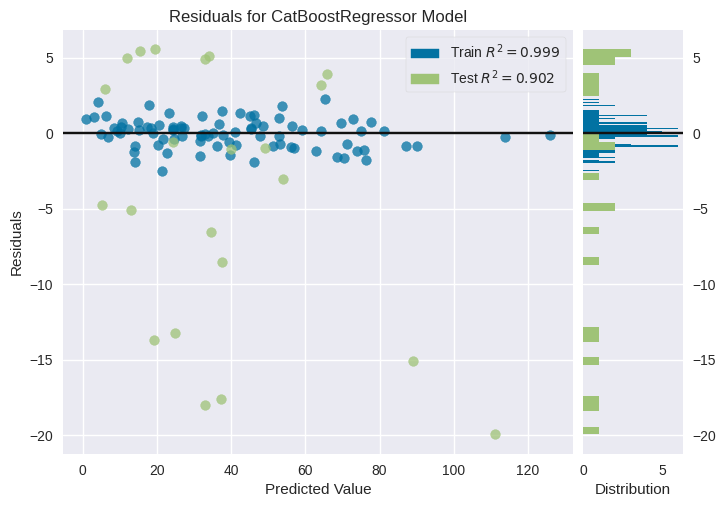

In [70]:
plot_model(tuned_catboost)

In [73]:
!pip install shap -q

In [74]:
import shap
pd.set_option('display.max_columns', None)
shap.initjs()

In [75]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

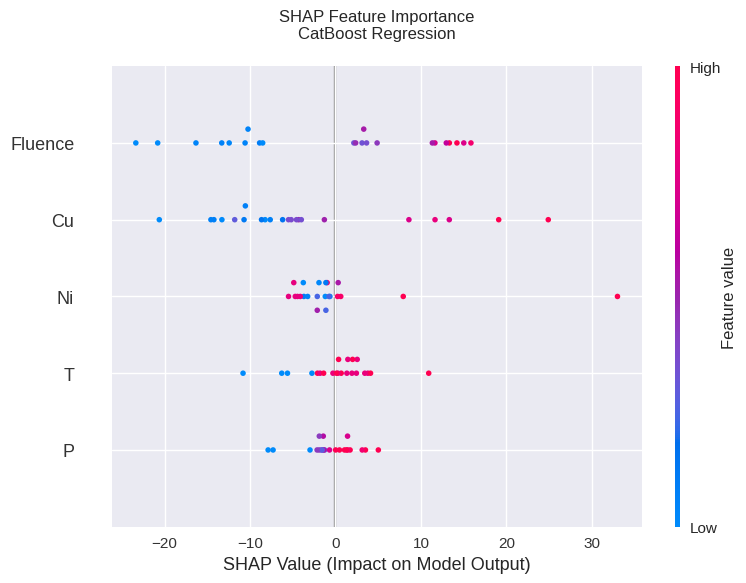

In [76]:
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_test, show=False, plot_size=None)
plt.title('SHAP Feature Importance\nCatBoost Regression', pad=20)
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.tight_layout()
